This notebook contains the network analysis of borrowing patterns among the author-members of the Shakespeare and Company lending library. The networks are constructed by connecting two author-members if they have borrowed books from the library. The networks are then analyzed to identify the most influential author-members and communities of author-members.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

In [3]:
member_is_author = pd.read_csv('../data/member_is_author.csv', encoding='utf-8')
events = pd.read_csv('../data/SCoData_events_v1.2_2022_01.csv', encoding='utf-8', low_memory=False)
books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})

In [4]:
member_is_author.columns

Index(['uri', 'name', 'sort_name', 'title', 'gender', 'is_organization',
       'has_card', 'birth_year', 'death_year', 'membership_years', 'viaf_url',
       'wikipedia_url', 'nationalities', 'addresses', 'postal_codes',
       'arrondissements', 'coordinates', 'notes', 'updated'],
      dtype='object')

In [5]:
events.columns

Index(['event_type', 'start_date', 'end_date', 'member_uris', 'member_names',
       'member_sort_names', 'subscription_price_paid', 'subscription_deposit',
       'subscription_duration', 'subscription_duration_days',
       'subscription_volumes', 'subscription_category',
       'subscription_purchase_date', 'reimbursement_refund', 'borrow_status',
       'borrow_duration_days', 'purchase_price', 'currency', 'item_uri',
       'item_title', 'item_volume', 'item_authors', 'item_year', 'item_notes',
       'source_type', 'source_citation', 'source_manifest', 'source_image'],
      dtype='object')

In [6]:
books.columns

Index(['uri', 'title', 'author', 'editor', 'translator', 'introduction',
       'illustrator', 'photographer', 'year', 'format', 'uncertain',
       'ebook_url', 'volumes_issues', 'notes', 'event_count', 'borrow_count',
       'purchase_count', 'circulation_years', 'updated'],
      dtype='object')

## Network Analysis

### Common Borrows by Author-Members (All Books)

In [7]:
# Filter events to include only those where the member is an author and the event type is 'Borrow'
member_borrows_author = events[(events['member_sort_names'].isin(member_is_author['sort_name'])) & (events['event_type'] == 'Borrow')]

# Display a random sample of the filtered events
member_borrows_author.sample(1)

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,item_uri,item_title,item_volume,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image
4739,Borrow,1924-12-15,1924-12-16,https://shakespeareandco.princeton.edu/members...,Solita Solano,"Solano, Solita",NaN,NaN,NaN,NaN,...,https://shakespeareandco.princeton.edu/books/c...,"The Windmill: Stories, Essays, Poems & Picture...",NaN,NaN,1923.0,NaN,Lending Library Card,"Sylvia Beach, Solita Solano Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/62...


In [8]:
member_borrows_author.member_sort_names.unique()

array(['Joyce, James', 'Hemingway, Ernest', 'Schlumberger, Jean',
       'Beach, Sylvia', 'Stein, Gertrude', 'Larbaud, Valery',
       'McAlmon, Robert', 'Wilson, Romer', 'Aragon, Louis',
       'Rodker, John', 'Wilder, Thornton', 'Pound, Ezra',
       'Mansfield, Katherine', 'Solano, Solita', 'de Lanux, Pierre',
       'Tree, Iris', 'Wickham, Anna', 'Wilson, Margaret',
       'Le Gallienne, Richard', 'Gilbert, Stuart', 'Boyd, James',
       'Flandrau, Grace', 'Porter, Katherine Anne', 'Lewisohn, Ludwig',
       'Tate, Allen', 'Gascoyne, David', 'Connolly, Cyril',
       'Merrick, Leonard', 'Dennis, Mary Cable', 'Rogers, Samuel',
       'Guilloux, Louis', 'Gramont, Élisabeth de', 'Ford, Ford Madox',
       'Paul, Elliot', 'Michaux, Henri', 'Wright, Richard', 'Gide, André'],
      dtype=object)

In [9]:
member_borrows_author.head(3)

,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,...,item_uri,item_title,item_volume,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image
46,Borrow,1931,1931-01-10,https://shakespeareandco.princeton.edu/members...,James Joyce,"Joyce, James",NaN,NaN,NaN,NaN,...,https://shakespeareandco.princeton.edu/books/m...,A History of Theatrical Art in Ancient and Mod...,NaN,"Mantzius, Karl",1903.0,NaN,Lending Library Card,James Joyce's lending library cards not repres...,NaN,NaN
51,Borrow,1931,1931-01-10,https://shakespeareandco.princeton.edu/members...,James Joyce,"Joyce, James",NaN,NaN,NaN,NaN,...,https://shakespeareandco.princeton.edu/books/s...,Poems of Walter Scott,NaN,"Scott, Walter",NaN,NaN,Lending Library Card,James Joyce's lending library cards not repres...,NaN,NaN
52,Borrow,1931,1931-01-10,https://shakespeareandco.princeton.edu/members...,James Joyce,"Joyce, James",NaN,NaN,NaN,NaN,...,https://shakespeareandco.princeton.edu/books/c...,The Horse-Stealers and Other Stories,NaN,"Chekhov, Anton",1921.0,NaN,Lending Library Card,James Joyce's lending library cards not repres...,NaN,NaN


In [10]:
def create_pivot_table(data, index, columns, values=None, aggfunc='size', fill_value=0):
    """
    Creates a pivot table from a DataFrame.

    Parameters:
    - data (pd.DataFrame): The input DataFrame.
    - index (str): The column to use as rows in the pivot table.
    - columns (str): The column to use as columns in the pivot table.
    - values (str or None): The column to aggregate. Default is None for count aggregation.
    - aggfunc (str or function): The aggregation function to apply. Default is 'size'.
    - fill_value (scalar): The value to use for missing data. Default is 0.

    Returns:
    - pd.DataFrame: The resulting pivot table.
    """
    return data.pivot_table(index=index, columns=columns, values=values, aggfunc=aggfunc, fill_value=fill_value)

In [11]:
member_borrows_author_matrix = create_pivot_table(
    data=member_borrows_author, 
    index='member_sort_names', 
    columns='item_title'
)

print(member_borrows_author_matrix)

item_title              A Bookman's Daybook  A Companion Volume  \
member_sort_names                                                 
Aragon, Louis                             0                   0   
Beach, Sylvia                             0                   0   
Boyd, James                               0                   0   
Connolly, Cyril                           0                   0   
Dennis, Mary Cable                        0                   0   
Flandrau, Grace                           0                   0   
Ford, Ford Madox                          0                   0   
Gascoyne, David                           0                   0   
Gide, André                               0                   0   
Gilbert, Stuart                           0                   0   
Gramont, Élisabeth de                     0                   0   
Guilloux, Louis                           0                   0   
Hemingway, Ernest                         1                   

In [12]:
# Count the number of borrows in the entire matrix
count_ones_author = (member_borrows_author_matrix >= 1).sum().sum()

# Display the results
count_ones_author

810

In [13]:
def compute_borrow_counts(matrix, top_n=25):
    """
    Computes the total borrow count for each book and displays the top borrowed books.

    Parameters:
        matrix (DataFrame): The user-book or member-book matrix.
        books (DataFrame): The books dataset containing 'title', 'author', and 'format' columns.
        top_n (int): Number of top borrowed books to display.

    Returns:
        DataFrame: A DataFrame with columns ['book_title', 'author', 'borrow_count'] sorted by borrow count.
    """
    # Sum the borrow counts across all users/members
    borrow_counts = matrix.sum(axis=0).reset_index()
    borrow_counts.columns = ['book_title', 'borrow_count']
    
    # Merge with the books dataset to include the author column
    borrow_counts = borrow_counts.merge(books[['title', 'author']], left_on='book_title', right_on='title', how='left')
    borrow_counts = borrow_counts[['book_title', 'author', 'borrow_count']]
    
    # Display the top N most borrowed books
    top_borrowed = borrow_counts.sort_values(by='borrow_count', ascending=False).head(top_n)
    
    return top_borrowed

In [14]:
compute_borrow_counts(member_borrows_author_matrix, top_n=22)

,book_title,author,borrow_count
423,Saturday Review of Literature,NaN,9
791,transition,NaN,8
744,Thomas De Quincey's Works,"de Quincey, Thomas",6
537,The Dial,NaN,4
32,A Portrait of the Artist as a Young Man,"Joyce, James",4
314,New Masses,NaN,4
213,Hound & Horn,NaN,4
101,Broom,NaN,4
694,The Symposium: A Critical Review,NaN,3
1,A Companion Volume,"McAlmon, Robert",3


In [15]:
# extract the members that borrowed "Saturdy Review of Literature"
members_borrowed_sat_lit = member_borrows_author_matrix[member_borrows_author_matrix['This Side of Paradise'] > 0].index
members_borrowed_sat_lit

Index(['Stein, Gertrude'], dtype='object', name='member_sort_names')

In [16]:
# extract the members that borrowed "Saturday Review of Literature"
members_borrowed_sat_lit = member_borrows_author_matrix[member_borrows_author_matrix["Saturday Review of Literature"] > 0].index
members_borrowed_sat_lit

Index(['Hemingway, Ernest'], dtype='object', name='member_sort_names')

In [17]:
def create_intersection_graph(matrix, threshold=0):
    """
    Creates a graph based on the intersection of borrowed items between users.

    Parameters:
    - matrix (pd.DataFrame): A DataFrame where rows represent users and columns represent items.
      Values indicate whether a user borrowed an item (e.g., binary or count values).
    - threshold (int): Minimum number of common items required to create an edge.

    Returns:
    - nx.Graph: A NetworkX graph where nodes are users and edges are weighted by the count of common items.
    """
    # Create an empty graph
    H = nx.Graph()

    # Add nodes and edges based on the intersection of borrowed items
    for user1 in matrix.index:
        for user2 in matrix.index:
            if user1 != user2:
                # Calculate intersection of items borrowed by both users
                common_items = sum((matrix.loc[user1] > 0) & (matrix.loc[user2] > 0))
                if common_items > threshold:
                    H.add_edge(user1, user2, weight=common_items)

    return H

In [18]:
# Create the first graph
G = create_intersection_graph(member_borrows_author_matrix)
print("Graph G - Number of nodes:", G.number_of_nodes())
print("Graph G - Number of edges:", G.number_of_edges())

Graph G - Number of nodes: 25
Graph G - Number of edges: 58


In this network, each node (person) represents an individual who borrowed books.
An edge between two nodes indicates that these two individuals have borrowed at least one book in common.

In [19]:
def plot_network(X, use_weight=True, k=None, titleAdd='', node_color='thistle', label_weights=False):
    """
    Plots a graph with optional edge weights and customizable node colors.

    Parameters:
    - X (networkx.Graph): The input graph.
    - use_weight (bool): If True, scales edge widths by the weight attribute.
    - k (float): The optimal distance between nodes for the layout.
    - titleAdd (str): Additional text for the title.
    - node_color (str or list): The color of the nodes. Can be a single color or a list of colors.
    - label_weights (bool): If True, labels the edges with their weights.
    """
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(X, seed=42, k=k)

    # Check if node_color is a list/array (i.e., for clustering) or a single color
    if isinstance(node_color, str):
        # Use a single color for all nodes
        nx.draw_networkx_nodes(X, pos, node_size=600, node_color=node_color)
    else:
        # Use colormap for clustering
        nx.draw_networkx_nodes(X, pos, node_size=600, node_color=node_color, cmap=plt.cm.viridis)

    if use_weight:
        weights = [X[u][v].get('weight', 1) for u, v in X.edges()]
        nx.draw_networkx_edges(X, pos, width=weights, alpha=0.5)
    else:
        nx.draw_networkx_edges(X, pos, alpha=0.5)

    # Draw labels with a bounding box to avoid overlap
    labels = nx.draw_networkx_labels(X, pos, font_size=10, font_family='sans-serif',
                                     bbox=dict(facecolor='white', boxstyle='round,pad=0.3'))

    # Adjust label positions to avoid overlap
    for _, t in labels.items():
        t.set_bbox(dict(facecolor='white', boxstyle='round,pad=0.3', alpha=0.7, edgecolor='none'))

    # Optionally label the weights on the edges
    if label_weights:
        edge_labels = nx.get_edge_attributes(X, 'weight')
        nx.draw_networkx_edge_labels(X, pos, edge_labels=edge_labels, font_size=10, bbox=dict(facecolor='white', edgecolor='none', alpha=0.6))

    # Ensure all labels are visible and not cut off by the border
    plt.margins(0.1)
    plt.title(f'Network of Users Borrowing the Same Books {titleAdd}', fontsize=16, fontweight='bold')
    # Disable the grid
    plt.grid(False)
    plt.show()

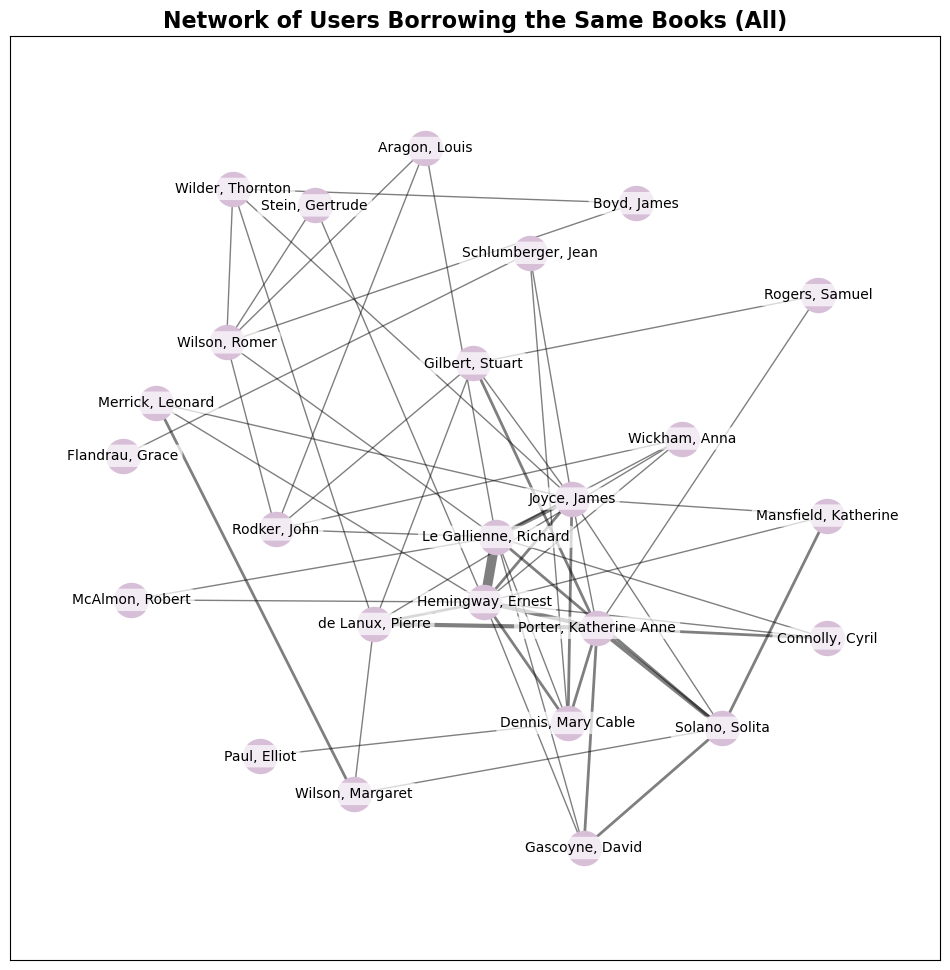

In [20]:
plot_network(G, k=1.7, titleAdd='(All)')

In [21]:
def plot_graph_metric(metric_dict, x_label, y_label, title=None, rotation=90, ylim=None):
    """
    Plots a bar chart for a given graph metric.

    Parameters:
    metric_dict (dict): A dictionary where keys are nodes and values are the metric to plot.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str, optional): Title of the plot. Defaults to None.
    rotation (int, optional): Rotation angle for x-axis labels. Defaults to 90.
    ylim (tuple, optional): Limits for the y-axis. Defaults to None.

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(metric_dict)), list(metric_dict.values()), align='center', color='cornflowerblue')
    plt.xticks(range(len(metric_dict)), list(metric_dict.keys()), rotation=rotation)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim:
        plt.ylim(ylim)
    else:
        plt.ylim(0, max(metric_dict.values()) + 1)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_side_by_side_graph_metrics(weighted_dict, unweighted_dict, x_label, y_label, title=None, rotation=90, ylim=None):
    """
    Plots a side-by-side bar chart for weighted and unweighted graph metrics.

    Parameters:
    weighted_dict (dict): A dictionary where keys are nodes and values are the weighted degree.
    unweighted_dict (dict): A dictionary where keys are nodes and values are the unweighted degree.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str, optional): Title of the plot. Defaults to None.
    rotation (int, optional): Rotation angle for x-axis labels. Defaults to 90.
    ylim (tuple, optional): Limits for the y-axis. Defaults to None.

    Returns:
    None
    """
    nodes = list(weighted_dict.keys())  # Assumes both dictionaries have the same keys
    weighted_values = [weighted_dict[node] for node in nodes]
    unweighted_values = [unweighted_dict[node] for node in nodes]

    x = np.arange(len(nodes))  # X positions for the nodes
    width = 0.4  # Width of each bar

    plt.figure(figsize=(12, 6))

    # Plot the unweighted and weighted degrees
    unweighted_bars = plt.bar(x - width / 2, unweighted_values, width=width, label='Unweighted Degree', color='lightblue')
    weighted_bars = plt.bar(x + width / 2, weighted_values, width=width, label='Weighted Degree', color='cornflowerblue')

    # Add labels and title
    plt.xticks(x, nodes, rotation=rotation)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim:
        plt.ylim(ylim)
    else:
        plt.ylim(0, max(max(weighted_values), max(unweighted_values)) + 1)
    plt.title(title, fontsize=16, fontweight='bold')

    plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Legend
    plt.legend(handles=[unweighted_bars, weighted_bars])

    plt.tight_layout()
    plt.show()


Individuals like Le Gallienne, Richard show a significant increase from unweighted to weighted degrees, suggesting that although the number of people he connects with is moderately high, the relationships involve multiple shared books. Conversely, individuals with high unweighted but relatively low weighted degrees might indicate broader but shallower connections.

High values in both metrics, as seen with Hemingway, Ernest, suggest a central figure in the network, likely influencing reading trends or being a core member in their reading community.
ow values in both metrics indicate peripheral figures in the network, potentially with more niche or specialized interests.

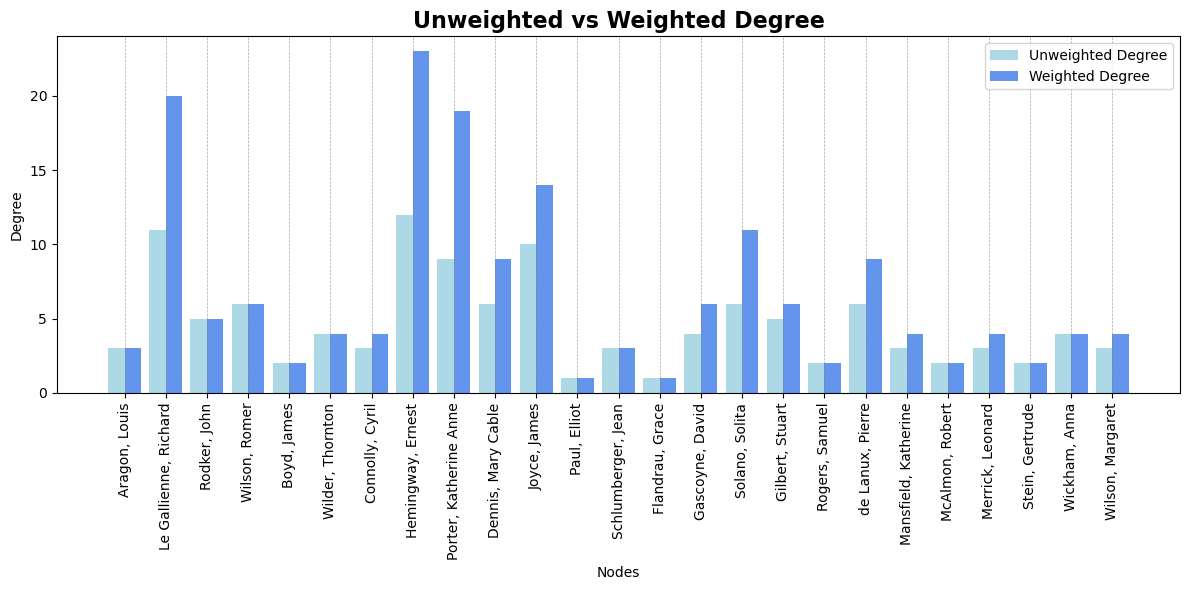

In [22]:
weighted_degree_dict_g = dict(G.degree(weight="weight"))
degree_dict_g = dict(G.degree())

plot_side_by_side_graph_metrics(weighted_degree_dict_g,
                                degree_dict_g,
                                x_label="Nodes",
                                y_label="Degree",
                                title="Unweighted vs Weighted Degree",
                                rotation=90)

In [23]:
sorted(degree_dict_g.items(), key=lambda x:x[1])

[('Paul, Elliot', 1),
 ('Flandrau, Grace', 1),
 ('Boyd, James', 2),
 ('Rogers, Samuel', 2),
 ('McAlmon, Robert', 2),
 ('Stein, Gertrude', 2),
 ('Aragon, Louis', 3),
 ('Connolly, Cyril', 3),
 ('Schlumberger, Jean', 3),
 ('Mansfield, Katherine', 3),
 ('Merrick, Leonard', 3),
 ('Wilson, Margaret', 3),
 ('Wilder, Thornton', 4),
 ('Gascoyne, David', 4),
 ('Wickham, Anna', 4),
 ('Rodker, John', 5),
 ('Gilbert, Stuart', 5),
 ('Wilson, Romer', 6),
 ('Dennis, Mary Cable', 6),
 ('Solano, Solita', 6),
 ('de Lanux, Pierre', 6),
 ('Porter, Katherine Anne', 9),
 ('Joyce, James', 10),
 ('Le Gallienne, Richard', 11),
 ('Hemingway, Ernest', 12)]

In [24]:
sorted(weighted_degree_dict_g.items(), key=lambda x:x[1])

[('Paul, Elliot', 1),
 ('Flandrau, Grace', 1),
 ('Boyd, James', 2),
 ('Rogers, Samuel', 2),
 ('McAlmon, Robert', 2),
 ('Stein, Gertrude', 2),
 ('Aragon, Louis', 3),
 ('Schlumberger, Jean', 3),
 ('Wilder, Thornton', 4),
 ('Connolly, Cyril', 4),
 ('Mansfield, Katherine', 4),
 ('Merrick, Leonard', 4),
 ('Wickham, Anna', 4),
 ('Wilson, Margaret', 4),
 ('Rodker, John', 5),
 ('Wilson, Romer', 6),
 ('Gascoyne, David', 6),
 ('Gilbert, Stuart', 6),
 ('Dennis, Mary Cable', 9),
 ('de Lanux, Pierre', 9),
 ('Solano, Solita', 11),
 ('Joyce, James', 14),
 ('Porter, Katherine Anne', 19),
 ('Le Gallienne, Richard', 20),
 ('Hemingway, Ernest', 23)]

#### Clustering Coefficient

Average clustering coefficient of network is about 0.41, which is relatively high. This suggests that the network is highly clustered, with many nodes forming tightly knit groups. This is a common property of social networks, where individuals tend to form groups with shared interests or characteristics.

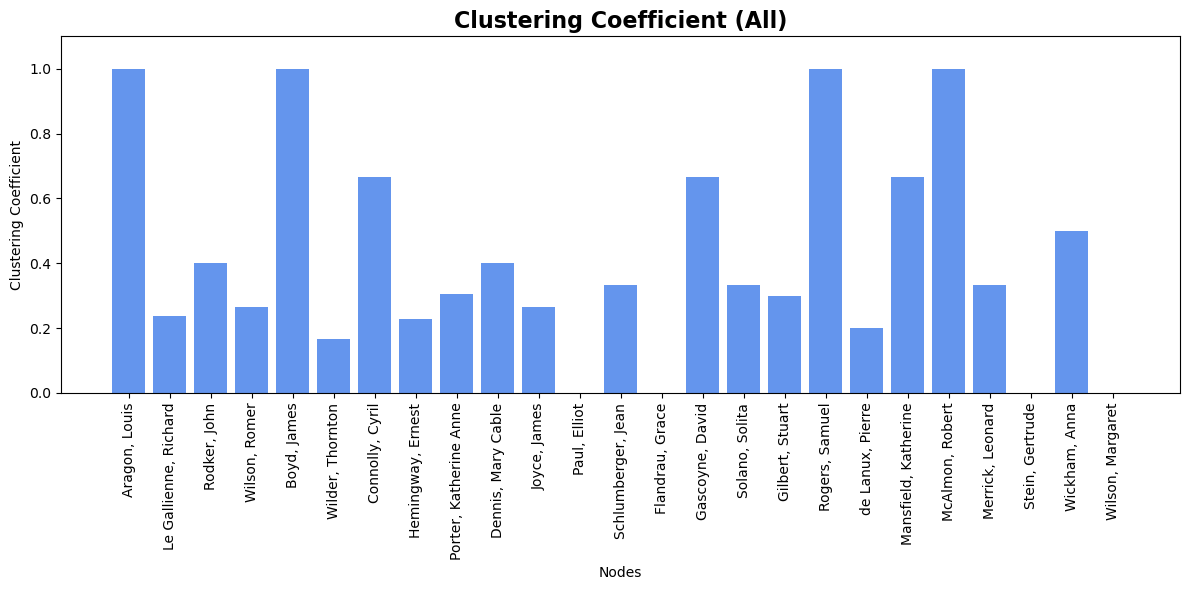

In [25]:
# Clustering coefficient
cluster_coefficient_g = nx.clustering(G)  # Replace G with your graph
plot_graph_metric(cluster_coefficient_g, x_label="Nodes", y_label="Clustering Coefficient", title="Clustering Coefficient (All)", ylim=(0, 1.1))  

In [26]:
cluster_coefficient_g

{'Aragon, Louis': 1.0,
 'Le Gallienne, Richard': 0.23636363636363636,
 'Rodker, John': 0.4,
 'Wilson, Romer': 0.26666666666666666,
 'Boyd, James': 1.0,
 'Wilder, Thornton': 0.16666666666666666,
 'Connolly, Cyril': 0.6666666666666666,
 'Hemingway, Ernest': 0.22727272727272727,
 'Porter, Katherine Anne': 0.3055555555555556,
 'Dennis, Mary Cable': 0.4,
 'Joyce, James': 0.26666666666666666,
 'Paul, Elliot': 0,
 'Schlumberger, Jean': 0.3333333333333333,
 'Flandrau, Grace': 0,
 'Gascoyne, David': 0.6666666666666666,
 'Solano, Solita': 0.3333333333333333,
 'Gilbert, Stuart': 0.3,
 'Rogers, Samuel': 1.0,
 'de Lanux, Pierre': 0.2,
 'Mansfield, Katherine': 0.6666666666666666,
 'McAlmon, Robert': 1.0,
 'Merrick, Leonard': 0.3333333333333333,
 'Stein, Gertrude': 0,
 'Wickham, Anna': 0.5,
 'Wilson, Margaret': 0}

#### Nodes, Edges, Diameter, Density, Average Shortest Path Length

In [27]:
# number of nodes
# number of members
nodes_g = len(G.nodes())
nodes_g

25

In [28]:
# number of edges
# number of relationships
edges_g = len(G.edges())
edges_g

58

The density of a graph is a measure of how many ties between actors exist compared to how many ties between actors are possible.

In [29]:
# density
density_g = nx.density(G)
density_g

0.19333333333333333

How many possible edges in the network are present? About 19% --> Relatively diverse reading habits

In [30]:
# diameter
diameter_g = nx.diameter(G)
diameter_g

4

The average shortest path length is calculated by finding the shortest path between all pairs of nodes, and taking the average over all paths of the length thereof (the length being the number of intermediate edges contained in the path).

Even in the relatively sparse network, members are not too distant from each other, meaning the library community is fairly interconnected.

In [31]:
# average shortest path length
average_shortest_path_g = nx.average_shortest_path_length(G)
average_shortest_path_g

2.1733333333333333

Any two nodes in the network can be connected by a little over two steps

#### Assortativity and Average Clustering Coefficient

The assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes. Positive values of r indicate a correlation between nodes of similar degree, while negative values indicate relationships between nodes of different degree. In general, r lies between −1 and 1. When r = 1, the network is said to have perfect assortative mixing patterns, when r = 0 the network is non-assortative, while at r = −1 the network is completely disassortative.

In [32]:
# assortativity
assortativity_g = nx.assortativity.degree_assortativity_coefficient(G)
assortativity_g

-0.22988687187582266

The assortativity coefficient of a graph is a measure of the extent to which vertices with the same properties connect to each other.

In [33]:
# average clustering coefficient
average_clustering_g = nx.average_clustering(G)
average_clustering_g

0.4107676767676767

#### Small World

In [34]:
# small worldness is defined as the ratio between average clustering coefficient and average shortest path length,
# relative to an equivalent random graph
small_world_g = average_clustering_g/average_shortest_path_g
small_world_g

0.18900353225506597

In [35]:
small_world_sigma_g = nx.algorithms.smallworld.sigma(G,niter=10,nrand=5)
small_world_sigma_g

1.0674846625766872

A sigma value greater than 1 indicates that the network exhibits small-world properties. The given network has higher clustering than a random network but similar path lengths, characteristic of small-world networks.

#### Cliques

All nodes in a clique are connected with each other.

Interesting are “maximal cliques”

In [36]:
clique_g = list(nx.clique.find_cliques(G))
print(len(clique_g))
print(max(clique_g, key=len))

34
['Wilson, Romer', 'Le Gallienne, Richard', 'Rodker, John', 'Aragon, Louis']


In [37]:
clique_g

[['Flandrau, Grace', 'Schlumberger, Jean'],
 ['Boyd, James', 'Wilder, Thornton', 'Wilson, Romer'],
 ['Wilson, Romer', 'Stein, Gertrude'],
 ['Wilson, Romer', 'Le Gallienne, Richard', 'Rodker, John', 'Aragon, Louis'],
 ['Rogers, Samuel', 'Gilbert, Stuart', 'Porter, Katherine Anne'],
 ['Paul, Elliot', 'Dennis, Mary Cable'],
 ['Wilson, Margaret', 'de Lanux, Pierre'],
 ['Wilson, Margaret', 'Solano, Solita'],
 ['Wilson, Margaret', 'Merrick, Leonard'],
 ['Wilder, Thornton', 'de Lanux, Pierre'],
 ['Wilder, Thornton', 'Joyce, James'],
 ['Solano, Solita', 'Joyce, James', 'Porter, Katherine Anne'],
 ['Solano, Solita', 'Joyce, James', 'Le Gallienne, Richard'],
 ['Solano, Solita', 'Joyce, James', 'Mansfield, Katherine'],
 ['Solano, Solita', 'Gascoyne, David', 'Porter, Katherine Anne'],
 ['Solano, Solita', 'Gascoyne, David', 'Le Gallienne, Richard'],
 ['Hemingway, Ernest', 'de Lanux, Pierre', 'Porter, Katherine Anne'],
 ['Hemingway, Ernest', 'de Lanux, Pierre', 'Wickham, Anna'],
 ['Hemingway, Ernest

#### Communities

“there are more links within a community than to nodes
outside of it”

label_propagation_communities generates community sets determined by label propagation

##### Label propagation

In [38]:
def get_node_colors_by_clustering(graph, clustering_algorithm):
    """
    Applies a clustering algorithm to the graph and returns node colors.

    Parameters:
    - graph (networkx.Graph): The input graph.
    - clustering_algorithm (function): The clustering algorithm to apply. 
      It should return a list of sets, where each set contains the nodes in a cluster.

    Returns:
    - list: A list of colors (one per node) representing cluster membership.
    """
    communities = list(clustering_algorithm(graph))  # Apply the clustering algorithm
    community_map = {node: idx for idx, community in enumerate(communities) for node in community}
    return [community_map[node] for node in graph.nodes()]

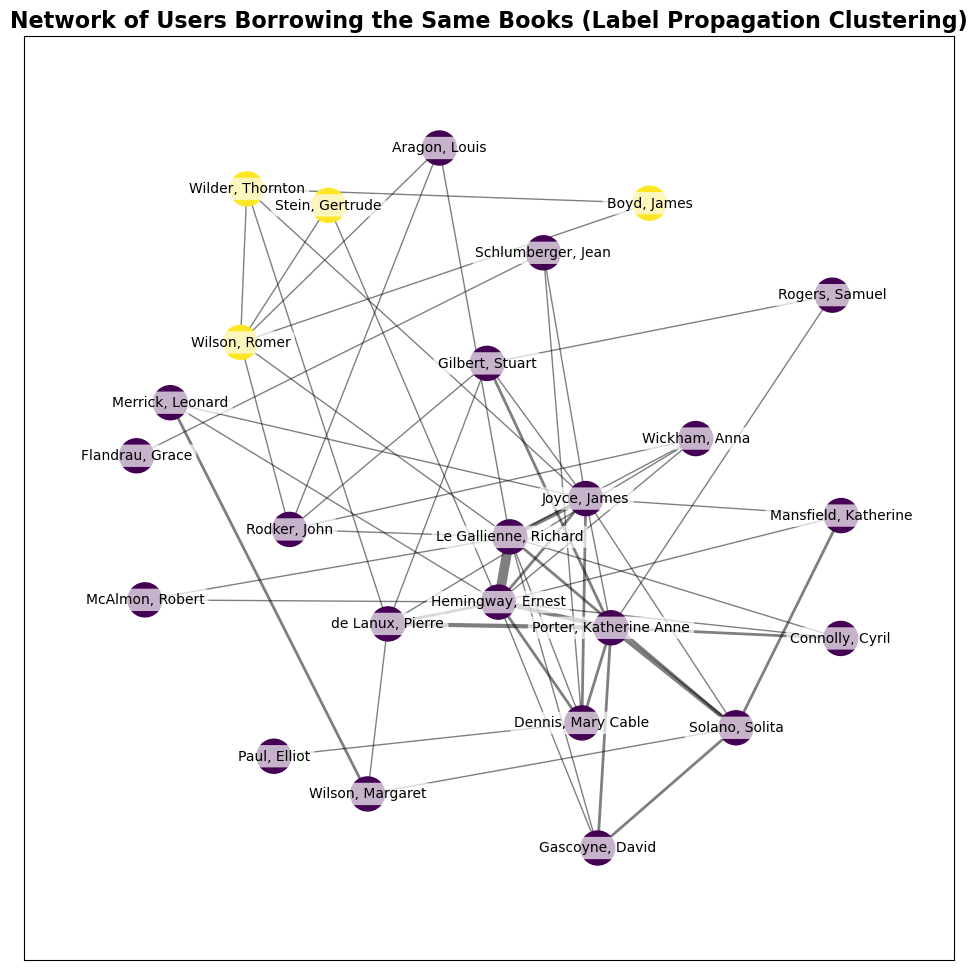

In [39]:
# Clustering with Label Propagation
label_propagation_colors_g = get_node_colors_by_clustering(G, nx.community.label_propagation_communities)

# Plot with Label Propagation
plot_network(G, use_weight=True, titleAdd='(Label Propagation Clustering)', k=1.7,node_color=label_propagation_colors_g)

##### Louvain

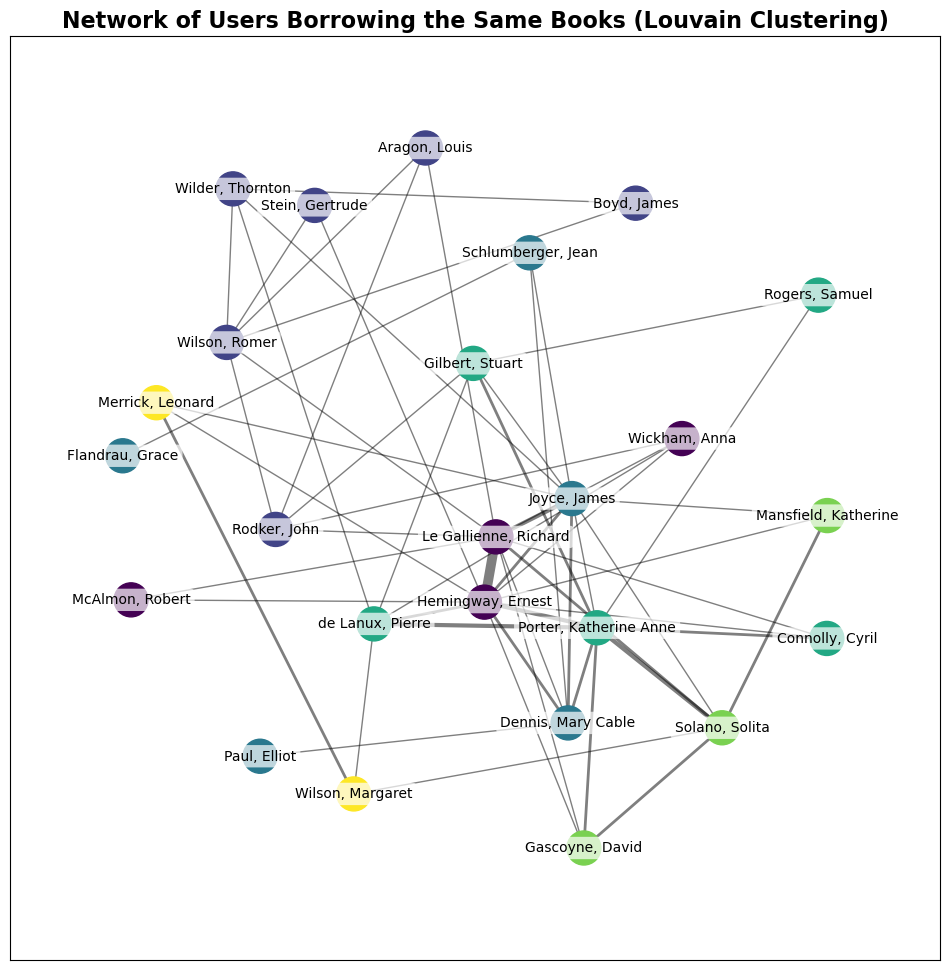

In [40]:
# Clustering with Louvain
louvain_colors_g = get_node_colors_by_clustering(G, nx.community.louvain_communities)

# Plot with Louvain
plot_network(G, titleAdd='(Louvain Clustering)', k=1.7,node_color=louvain_colors_g)

##### Greedy Modularity

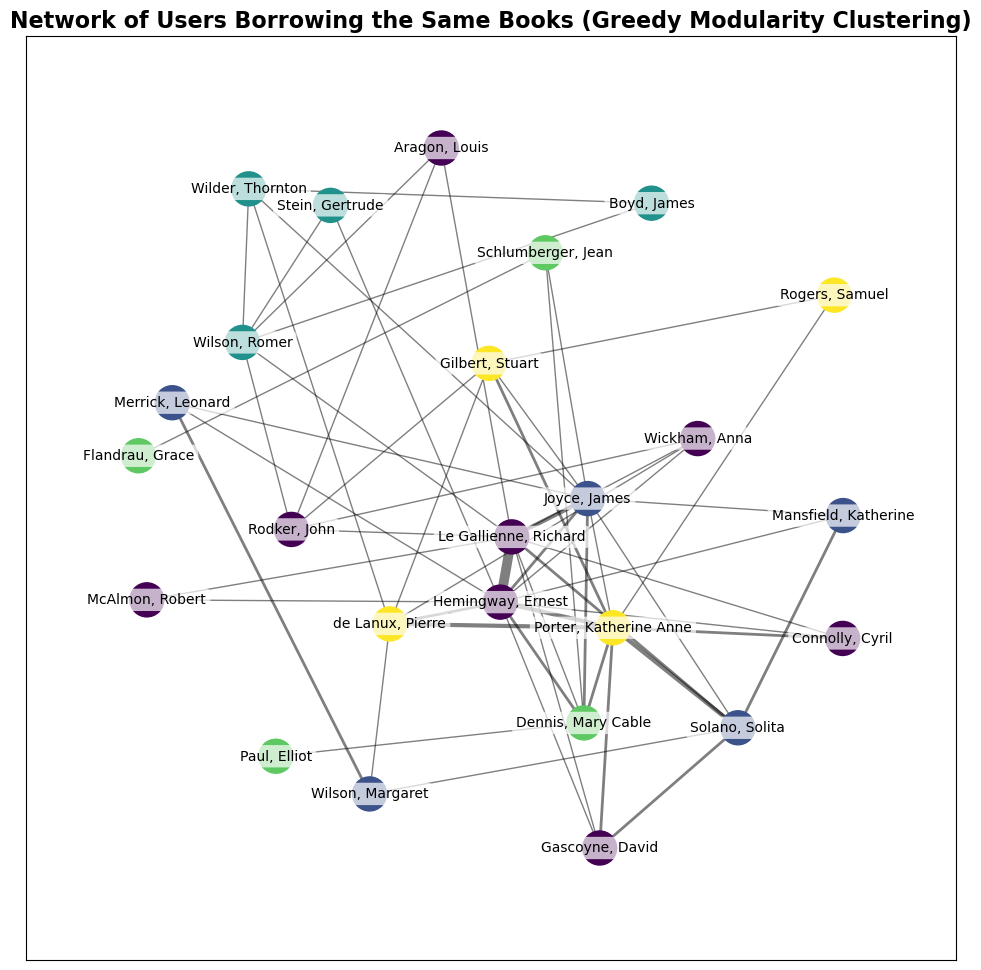

In [41]:
# Clustering with Greedy Modularity
greedy_modularity_colors_g = get_node_colors_by_clustering(G, nx.community.greedy_modularity_communities)

# Plot with Greedy Modularity
plot_network(G, titleAdd='(Greedy Modularity Clustering)', k=1.7,node_color=greedy_modularity_colors_g)

#### Network Graph: Books and Author-Members

In [42]:
def create_edge_list(pivot_table, min_borrow_count=1):
    """
    Converts a pivot table to an edge list and filters out books borrowed less than a specified number of times.

    Parameters:
    pivot_table (pd.DataFrame): A pivot table with members and items.
    min_borrow_count (int): Minimum number of times a book should be borrowed to be included. Default is 1.

    Returns:
    pd.DataFrame: Filtered edge list.
    """
    edge_list = pivot_table.stack().reset_index()
    edge_list.columns = ['member_sort_names', 'item_title', 'borrowed']
    edge_list = edge_list[edge_list['borrowed'] > 0]
    
    # Filter books borrowed more than `min_borrow_count` times
    book_counts = edge_list['item_title'].value_counts()
    books_multi_borrowed = book_counts[book_counts > min_borrow_count].index
    edge_list = edge_list[edge_list['item_title'].isin(books_multi_borrowed)]
    
    return edge_list

def build_graph(edge_list):
    """
    Builds a graph from an edge list.

    Parameters:
    edge_list (pd.DataFrame): DataFrame containing source and target nodes.

    Returns:
    networkx.Graph: Generated graph.
    """
    return nx.from_pandas_edgelist(edge_list, source='item_title', target='member_sort_names', create_using=nx.Graph())

def assign_node_colors(graph, item_nodes, item_color='lightsteelblue', member_color='darkorange'):
    """
    Assigns colors to nodes based on their type (item or member).

    Parameters:
    graph (networkx.Graph): The graph containing nodes.
    item_nodes (set): A set of item nodes to be colored.
    item_color (str): Color for item nodes. Default is 'lightsteelblue'.
    member_color (str): Color for member nodes. Default is 'darkorange'.

    Returns:
    list: List of colors corresponding to each node in the graph.
    """
    return [item_color if node in item_nodes else member_color for node in graph]

c:\Users\dittm\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


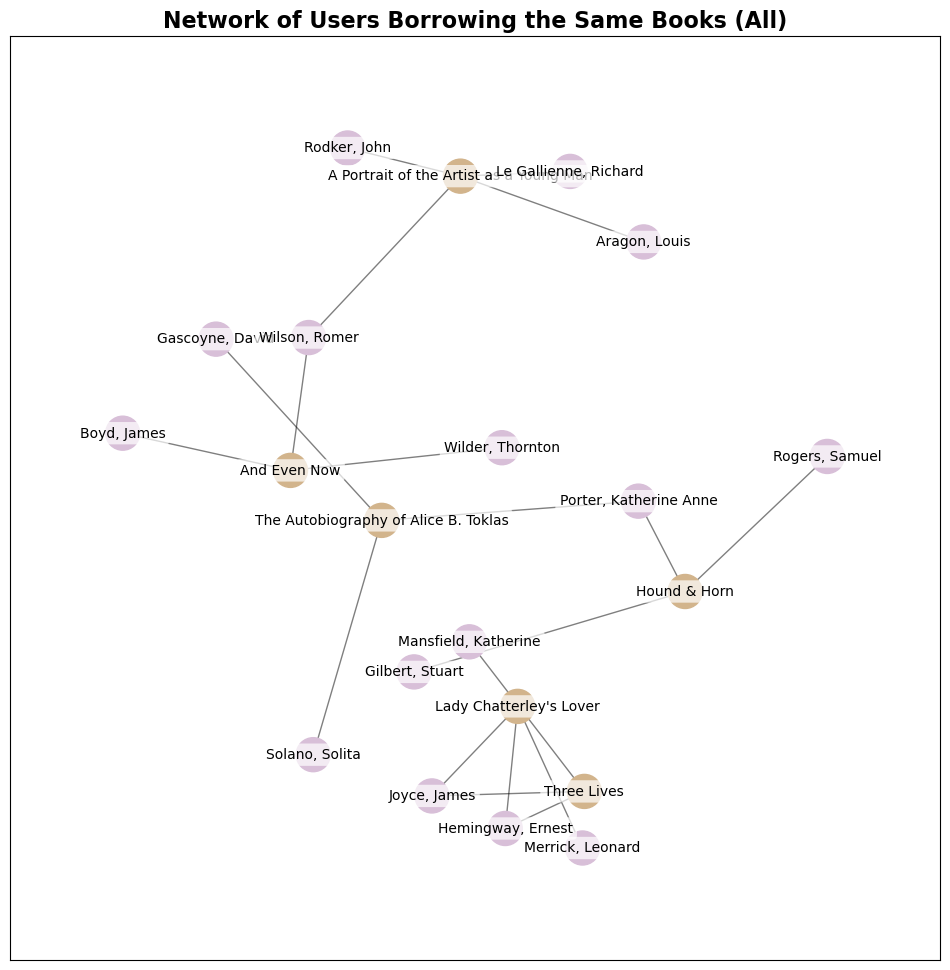

In [43]:
# Generate the edge list and graph
edge_list_g = create_edge_list(member_borrows_author_matrix, min_borrow_count=2)
G_B = build_graph(edge_list_g)

# Generate node colors
node_colors_g = assign_node_colors(
    G_B, 
    item_nodes=set(edge_list_g['item_title'].unique()), 
    item_color='tan', 
    member_color='thistle'
)

plot_network(
    G_B, 
    use_weight=False,  # Set to True if edge weights are to be used
    k=0.88,  # Adjust as necessary for optimal layout
    titleAdd='(All)', 
    node_color=node_colors_g  # Pass the computed node colors
)

--------

### Common Borrows by Author-Members (Only Books by Author-Members)

In [44]:
#member_borrows_member = member_borrows_author[member_borrows_author.item_authors.isin(member_is_author.sort_name)]

member_borrows_member = member_borrows_author[member_borrows_author.item_authors.isin(member_is_author.sort_name)]

member_borrows_member.shape

(73, 28)

In [45]:
member_borrows_member_matrix = create_pivot_table(
    data=member_borrows_member, 
    index='member_sort_names', 
    columns='item_title'
)

print(member_borrows_member_matrix)

item_title              A Companion Volume  A Farewell to Arms  A Good Woman  \
member_sort_names                                                              
Aragon, Louis                            0                   0             0   
Beach, Sylvia                            0                   0             0   
Connolly, Cyril                          0                   0             0   
Dennis, Mary Cable                       0                   0             0   
Ford, Ford Madox                         0                   0             0   
Gascoyne, David                          0                   0             0   
Gilbert, Stuart                          0                   0             0   
Hemingway, Ernest                        0                   0             0   
Joyce, James                             0                   0             0   
Le Gallienne, Richard                    0                   1             0   
Mansfield, Katherine                    

In [46]:
borrow_counts_member = compute_borrow_counts(member_borrows_member_matrix)

In [47]:
# Count the number of borrows in the entire matrix
count_ones_member = (member_borrows_member_matrix >= 1).sum().sum()

# Display the results
count_ones_member

69

In [48]:
# Create the second graph
P = create_intersection_graph(member_borrows_member_matrix)
print("Graph P - Number of nodes:", P.number_of_nodes())
print("Graph P - Number of edges:", P.number_of_edges())

Graph P - Number of nodes: 14
Graph P - Number of edges: 18


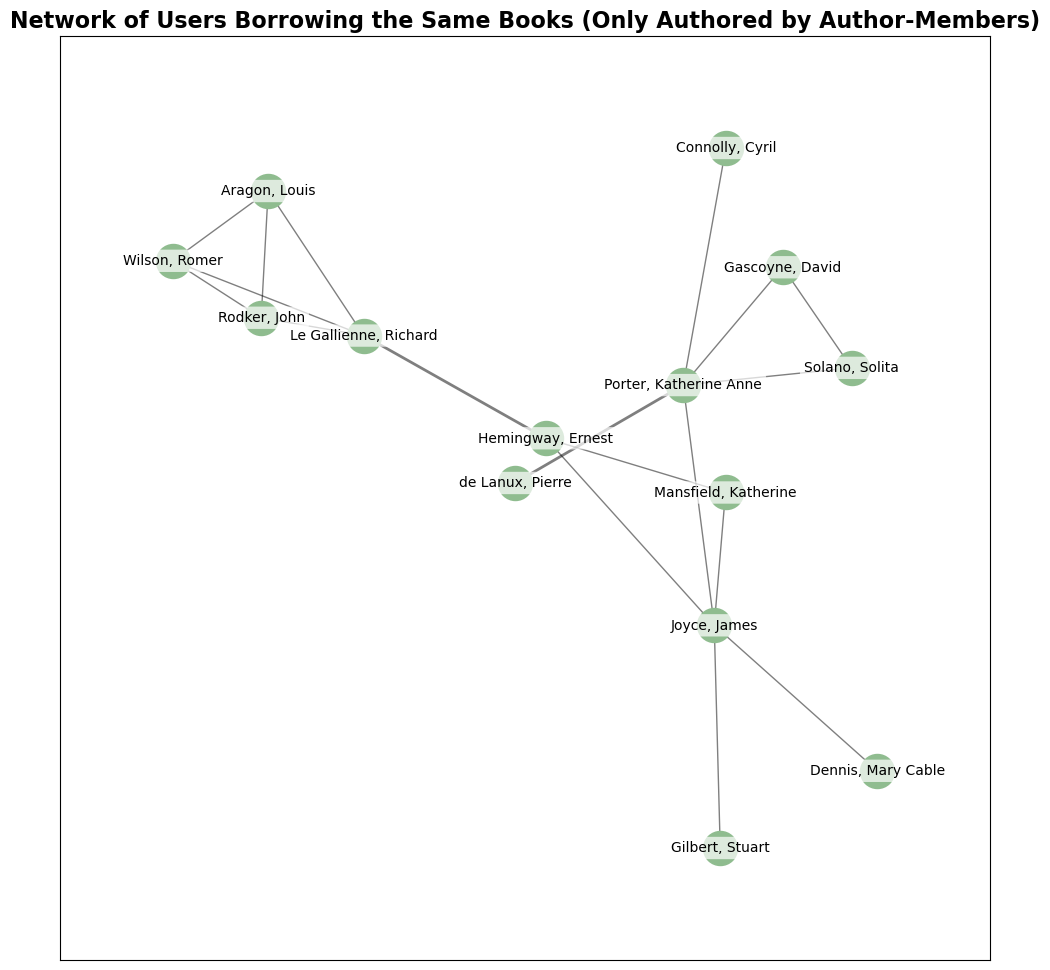

In [49]:
plot_network(P, use_weight=True, k=0.67, titleAdd='(Only Authored by Author-Members)', node_color='darkseagreen')

In [50]:
edge_weights_members_p = nx.get_edge_attributes(P,'weight')

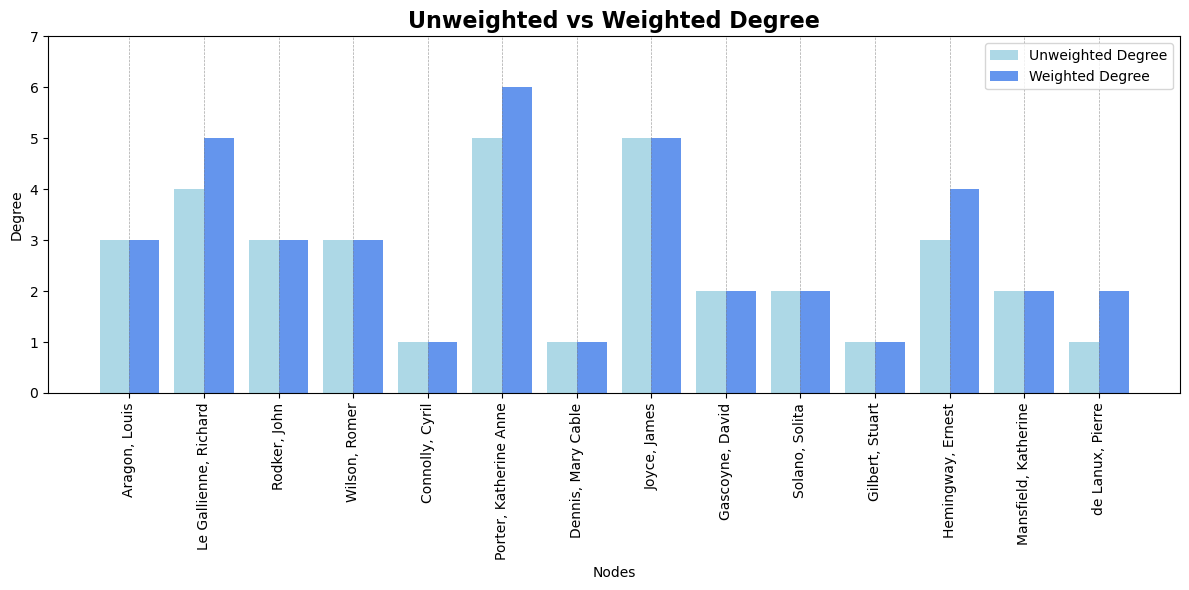

In [51]:
weighted_degree_dict_p = dict(P.degree(weight="weight"))
degree_dict_p = dict(P.degree())

plot_side_by_side_graph_metrics(weighted_degree_dict_p,
                                degree_dict_p,
                                x_label="Nodes",
                                y_label="Degree",
                                title="Unweighted vs Weighted Degree",
                                rotation=90)

In [52]:
sorted(weighted_degree_dict_p.items(), key=lambda x:x[1])

[('Connolly, Cyril', 1),
 ('Dennis, Mary Cable', 1),
 ('Gilbert, Stuart', 1),
 ('Gascoyne, David', 2),
 ('Solano, Solita', 2),
 ('Mansfield, Katherine', 2),
 ('de Lanux, Pierre', 2),
 ('Aragon, Louis', 3),
 ('Rodker, John', 3),
 ('Wilson, Romer', 3),
 ('Hemingway, Ernest', 4),
 ('Le Gallienne, Richard', 5),
 ('Joyce, James', 5),
 ('Porter, Katherine Anne', 6)]

#### Clustering Coefficient

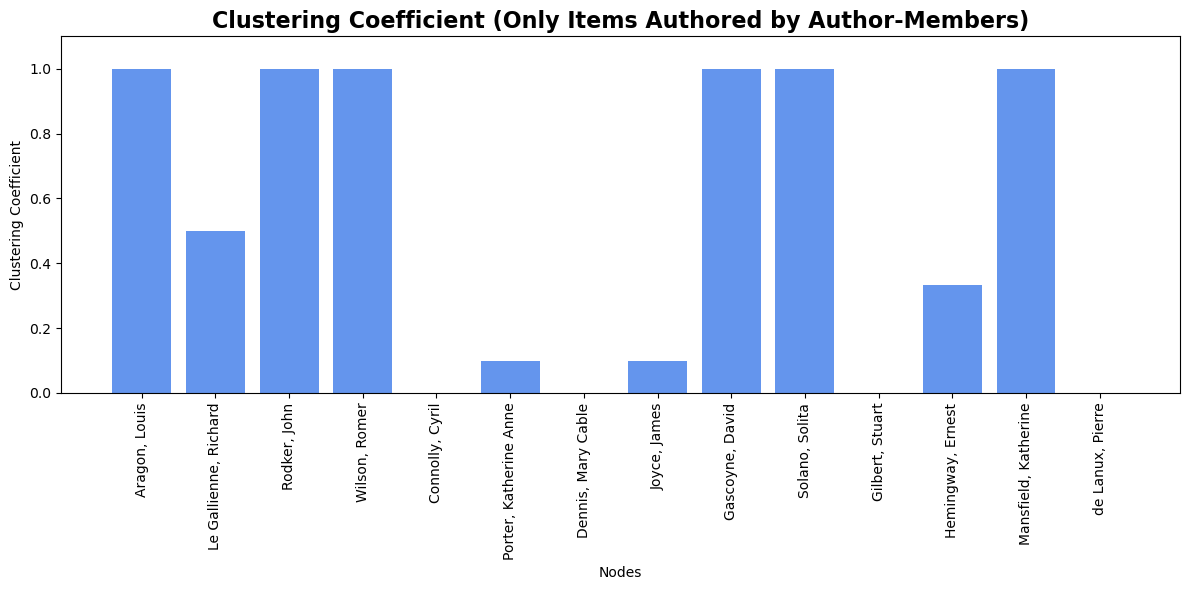

In [53]:
# Clustering coefficient
cluster_coefficient_p = nx.clustering(P)  # Replace G with your graph
plot_graph_metric(cluster_coefficient_p, x_label="Nodes", y_label="Clustering Coefficient", title="Clustering Coefficient (Only Items Authored by Author-Members)", ylim=(0, 1.1)) 

In [54]:
cluster_coefficient_p

{'Aragon, Louis': 1.0,
 'Le Gallienne, Richard': 0.5,
 'Rodker, John': 1.0,
 'Wilson, Romer': 1.0,
 'Connolly, Cyril': 0,
 'Porter, Katherine Anne': 0.1,
 'Dennis, Mary Cable': 0,
 'Joyce, James': 0.1,
 'Gascoyne, David': 1.0,
 'Solano, Solita': 1.0,
 'Gilbert, Stuart': 0,
 'Hemingway, Ernest': 0.3333333333333333,
 'Mansfield, Katherine': 1.0,
 'de Lanux, Pierre': 0}

#### Nodes, Edges, Diameter, Density, Average Shortest Path Length

In [55]:
# number of nodes
# number of members
nodes_p = len(P.nodes())
nodes_p

14

In [56]:
# number of edges
# number of relationships
edges_p = len(P.edges())
edges_p

18

In [57]:
# density
density_p = nx.density(P)
density_p

0.1978021978021978

In [58]:
# diameter
diameter_p = nx.diameter(P)
diameter_p

5

In [59]:
# average shortest path length
average_shortest_path_p = nx.average_shortest_path_length(P)
average_shortest_path_p

2.758241758241758

#### Assortativity and Average Clustering Coefficient

In [60]:
# assortativity
assortativity_p = nx.assortativity.degree_assortativity_coefficient(P)
assortativity_p

-0.5817223198594034

In [61]:
# average clustering coefficient
average_clustering_p = nx.average_clustering(P)
average_clustering_p

0.5023809523809524

#### Small World

In [62]:
# small worldness is defined as the ratio between average clustering coefficient and average shortest path length,
# relative to an equivalent random graph
small_world_p = nx.average_clustering(P)/nx.average_shortest_path_length(P)
small_world_p

0.18213811420982737

In [63]:
small_world_sigma_p = nx.algorithms.smallworld.sigma(P,niter=10,nrand=5)
small_world_sigma_p

2.47301702281782

#### Cliques

In [64]:
clique_p = list(nx.clique.find_cliques(P))

In [65]:
len(clique_p)

9

In [66]:
clique_p = list(nx.clique.find_cliques(P))
print(len(clique_p))
print(max(clique_p, key=len))

9
['Wilson, Romer', 'Rodker, John', 'Le Gallienne, Richard', 'Aragon, Louis']


#### Communities

##### Label Propagation

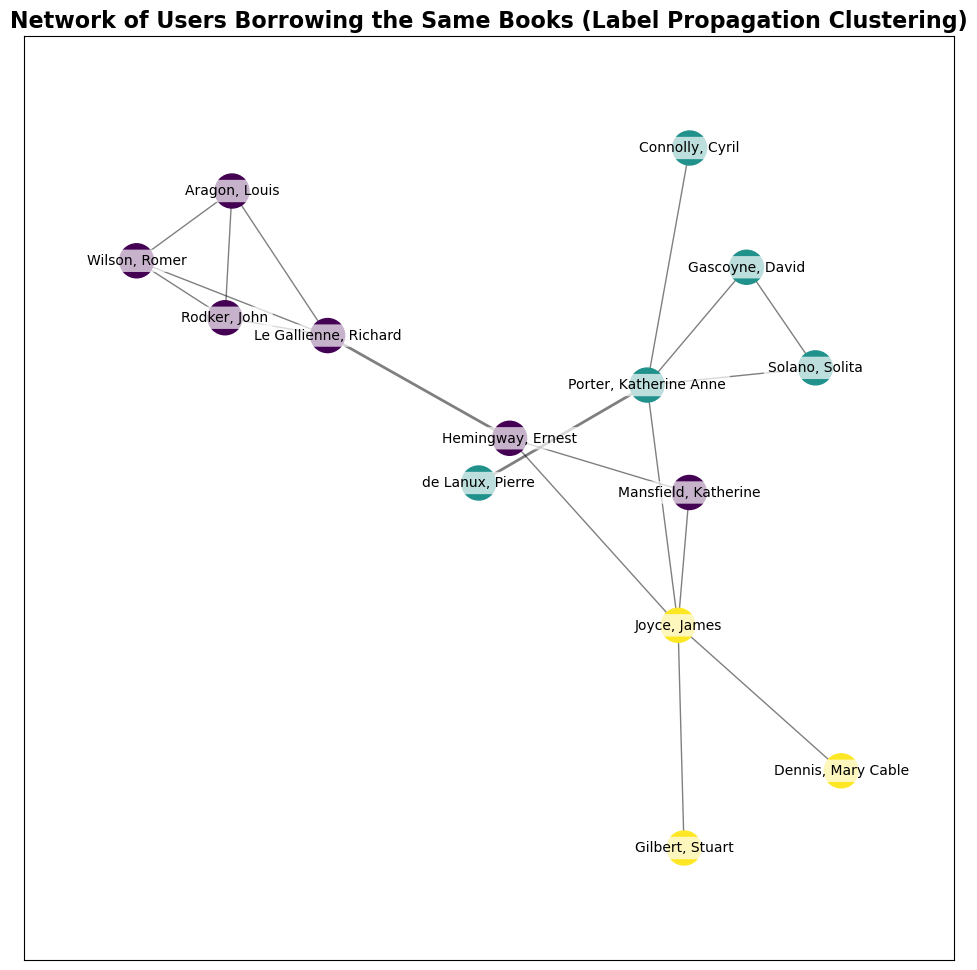

In [67]:
# Clustering with Label Propagation
label_propagation_colors_p = get_node_colors_by_clustering(P, nx.community.label_propagation_communities)

# Plot with Label Propagation
plot_network(P, use_weight=True, titleAdd='(Label Propagation Clustering)', k=0.67,node_color=label_propagation_colors_p)

##### Louvain

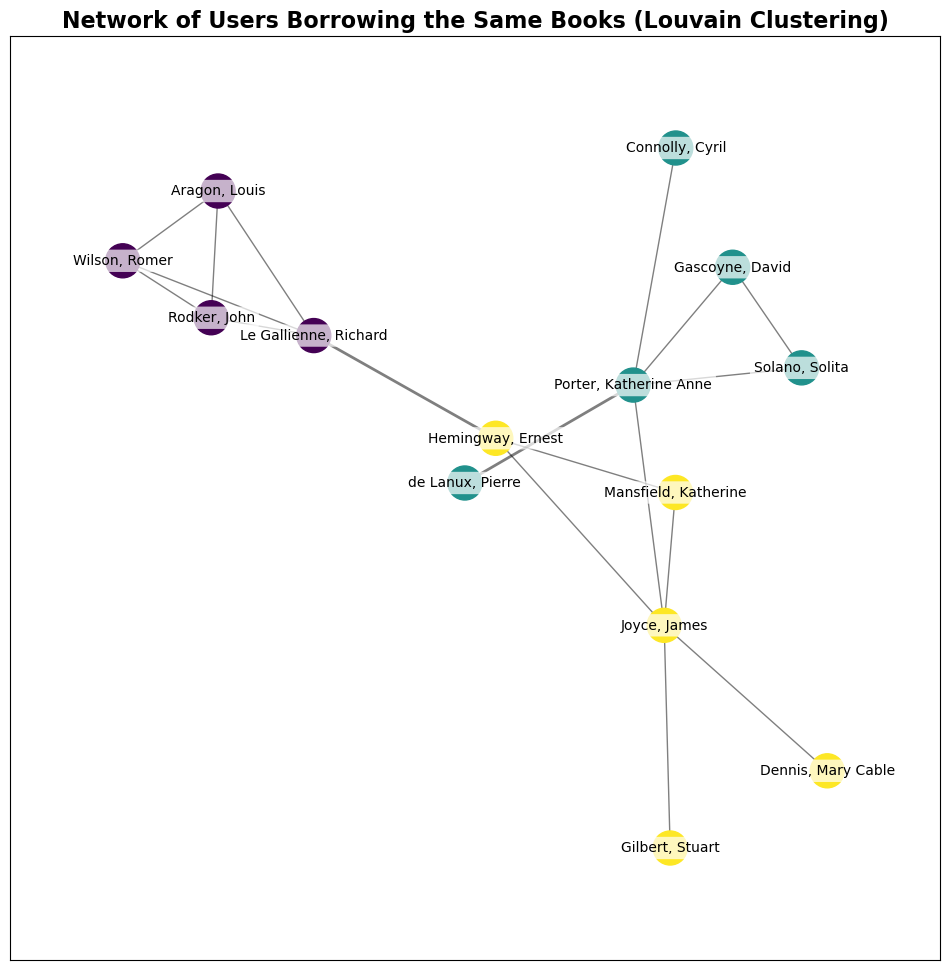

In [68]:
# Clustering with Louvain
louvain_colors_p = get_node_colors_by_clustering(P, nx.community.louvain_communities)

# Plot with Louvain
plot_network(P, use_weight=True, titleAdd='(Louvain Clustering)', k=0.67,node_color=louvain_colors_p)

##### Greedy Modularity

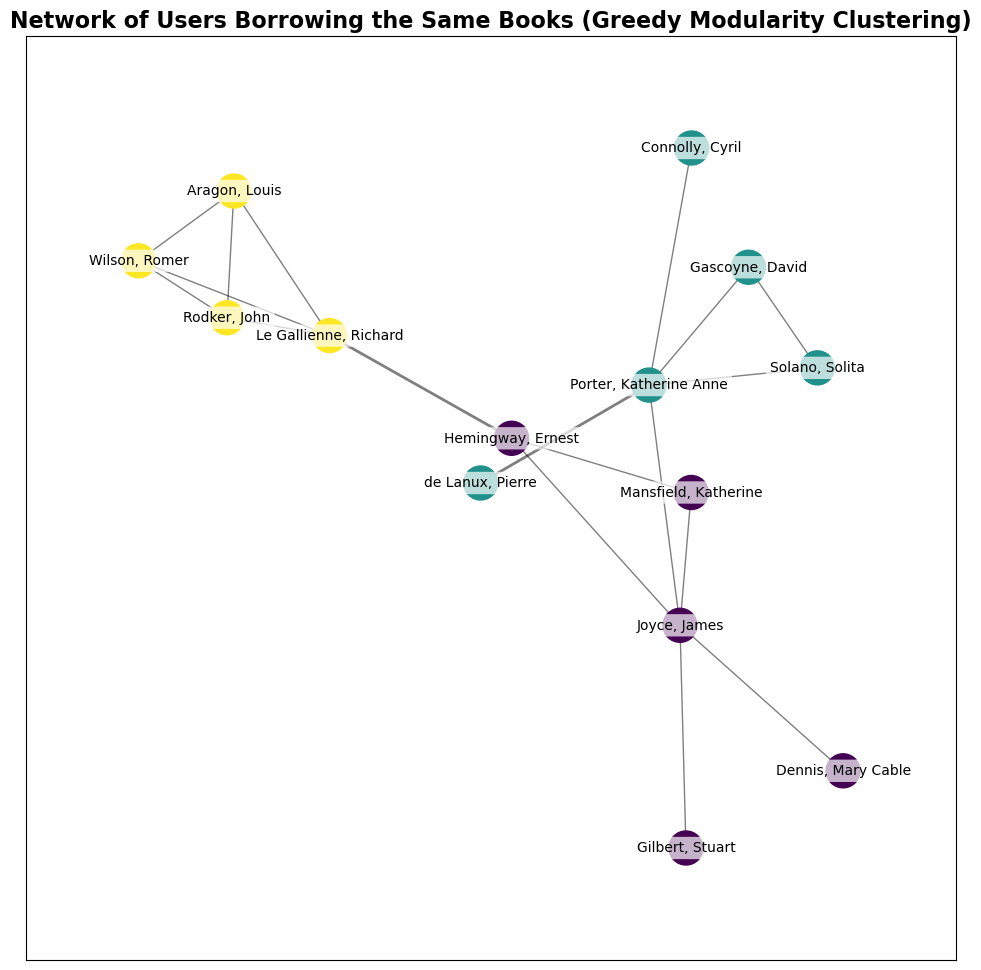

In [69]:
# Clustering with Greedy Modularity
greedy_modularity_colors_p = get_node_colors_by_clustering(P, nx.community.greedy_modularity_communities)

# Plot with Greedy Modularity
plot_network(P, use_weight=True, titleAdd='(Greedy Modularity Clustering)', k=0.67,node_color=greedy_modularity_colors_p)

In [70]:
compute_borrow_counts(member_borrows_member_matrix, top_n=14)

,book_title,author,borrow_count
6,A Portrait of the Artist as a Young Man,"Joyce, James",4
0,A Companion Volume,"McAlmon, Robert",3
35,The Autobiography of Alice B. Toklas,"Stein, Gertrude",3
47,Three Lives,"Stein, Gertrude",3
4,A Mirror to France,"Ford, Ford Madox",2
49,To Return to Yesterday: Reminiscences 1894 – 1914,"Ford, Ford Madox",2
8,Back to Montparnasse: Glimpses of Broadway in ...,"Huddleston, Sisley",2
28,Oscar Wilde: His Life and Confessions,"Harris, Frank",2
11,Death in the Afternoon,"Hemingway, Ernest",2
12,Distinguished Air: Grim Fairy Tales,"McAlmon, Robert",2


In [71]:
# extract the members that borrowed "Saturdy Review of Literature"
members_borrowed_sat_lit = member_borrows_member_matrix[member_borrows_member_matrix["This Side of Paradise"] > 0].index
members_borrowed_sat_lit

Index(['Stein, Gertrude'], dtype='object', name='member_sort_names')

#### Network Graph: Books and Author-Members

c:\Users\dittm\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


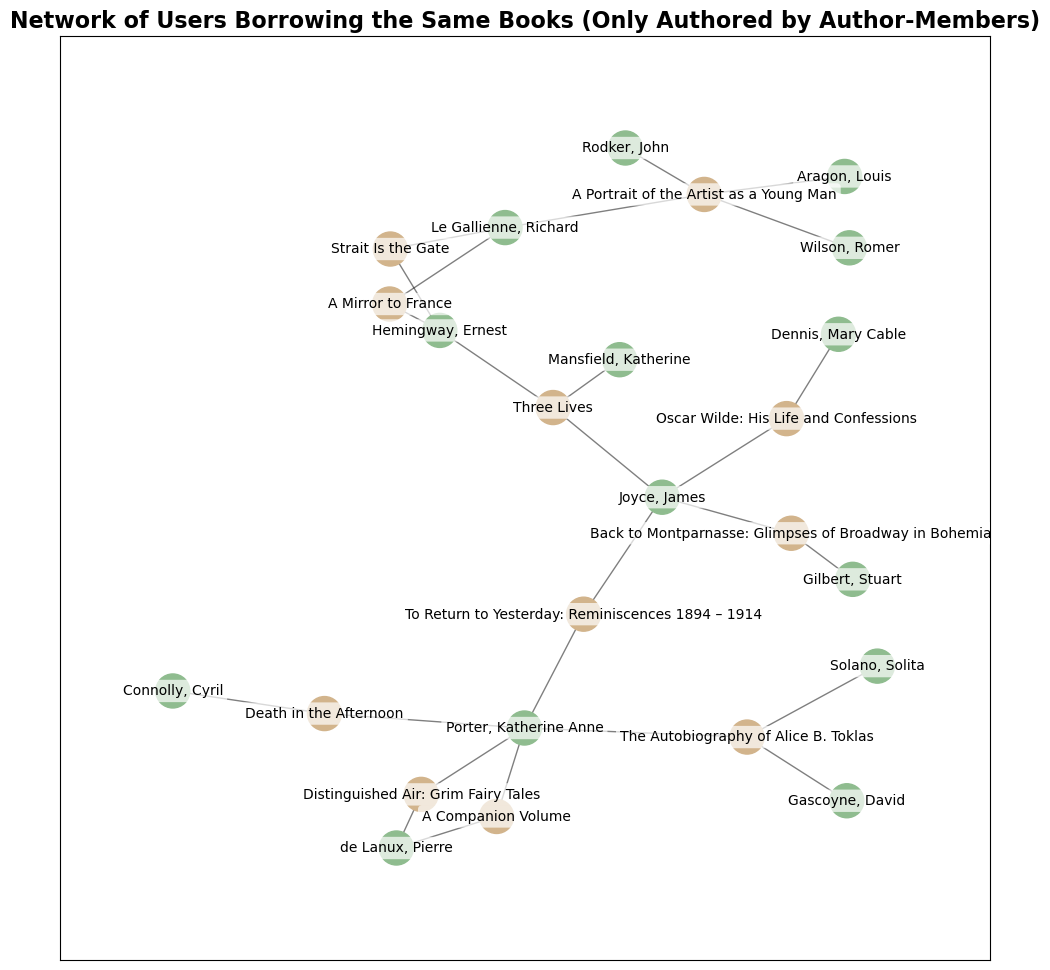

In [72]:
# Generate the edge list and graph
edge_list_p = create_edge_list(member_borrows_member_matrix, min_borrow_count=1)
P_B = build_graph(edge_list_p)

# Generate node colors
node_colors = assign_node_colors(
    P_B, 
    item_nodes=set(edge_list_p['item_title'].unique()), 
    item_color='tan', 
    member_color='darkseagreen'
)

plot_network(
    P_B, 
    use_weight=True,  # Set to True if edge weights are to be used
    k=0.3334,  # Adjust as necessary for optimal layout
    titleAdd='(Only Authored by Author-Members)', 
    node_color=node_colors  # Pass the computed node colors
)

In [73]:
edge_list_p

,member_sort_names,item_title,borrowed
6,"Aragon, Louis",A Portrait of the Artist as a Young Man,1
119,"Connolly, Cyril",Death in the Afternoon,1
190,"Dennis, Mary Cable",Oscar Wilde: His Life and Confessions,1
305,"Gascoyne, David",The Autobiography of Alice B. Toklas,1
332,"Gilbert, Stuart",Back to Montparnasse: Glimpses of Broadway in ...,1
382,"Hemingway, Ernest",A Mirror to France,1
409,"Hemingway, Ernest",Strait Is the Gate,1
425,"Hemingway, Ernest",Three Lives,1
440,"Joyce, James",Back to Montparnasse: Glimpses of Broadway in ...,1
460,"Joyce, James",Oscar Wilde: His Life and Confessions,1
